In [101]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [102]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
import os
os.chdir('/content/drive/MyDrive')

In [104]:
# Cargar dataset
df = pd.read_csv('/content/drive/MyDrive/base-de-datos-mets-opt_cleaned_final.csv', encoding='latin-1')


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EXPEDIENTE                  466 non-null    int64  
 1   EDAD                        466 non-null    int64  
 2   SEXO                        466 non-null    object 
 3   TUMOR PRIMARIO              466 non-null    object 
 4   SUBTIPO HISTOLOGICO         466 non-null    object 
 5   PERFIL MOLECULAR            466 non-null    object 
 6   AÑO                         466 non-null    float64
 7    No. METS                   466 non-null    object 
 8   TAMAÑO (mm)                 466 non-null    object 
 9   LOCALIZACION                466 non-null    object 
 10  CIRUGIA PREVIA              466 non-null    object 
 11  SRS                         466 non-null    object 
 12  DOSIS (Gy)                  466 non-null    int64  
 13  TECNICA                     466 non

In [106]:
# Vista previa de las dimensiones de dataaset e identificar inconsistencias
print('Forma:', df.shape)
print('\
Columas:', df.columns.tolist())
print('\
Valores nulos:')
print(df.isnull().sum())
print('\
duplicados:', df.duplicates().sum() if hasattr(df, 'duplicates') else len(df[df.duplicated()]))
print('\
Muestra de los datos:')
print(df.head())

Forma: (466, 18)
Columas: ['EXPEDIENTE', 'EDAD', 'SEXO', 'TUMOR PRIMARIO', 'SUBTIPO HISTOLOGICO', 'PERFIL MOLECULAR', 'AÑO', ' No. METS', 'TAMAÑO (mm)', 'LOCALIZACION', 'CIRUGIA PREVIA', 'SRS', 'DOSIS (Gy)', 'TECNICA ', 'TRATAMIENTO SISTEMICO', 'RESPUESTA (CRITERIOS RANO)', 'ID_unico', 'RESPUESTA_BINARIA']
Valores nulos:
EXPEDIENTE                    0
EDAD                          0
SEXO                          0
TUMOR PRIMARIO                0
SUBTIPO HISTOLOGICO           0
PERFIL MOLECULAR              0
AÑO                           0
 No. METS                     0
TAMAÑO (mm)                   0
LOCALIZACION                  0
CIRUGIA PREVIA                0
SRS                           0
DOSIS (Gy)                    0
TECNICA                       0
TRATAMIENTO SISTEMICO         0
RESPUESTA (CRITERIOS RANO)    0
ID_unico                      0
RESPUESTA_BINARIA             0
dtype: int64
duplicados: 0
Muestra de los datos:
   EXPEDIENTE  EDAD SEXO  TUMOR PRIMARIO           S

Realizar una prueba chi-cuadrado para nalizar la relación entre “CIRUGÍA PREVIA” (variable categórica) y “RESPUESTA_BINARIA” (resultado binario) para determinar si la cirugía previa impacta significativamente en la respuesta binaria.

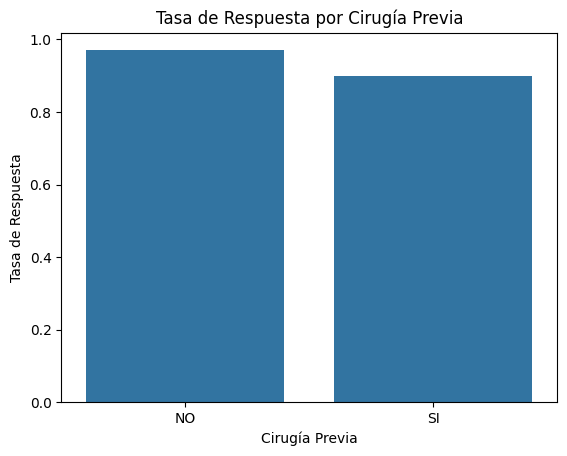

Resultado del test Chi-squared:
Chi2: 2.321810758579682
p-value: 0.12757144497293502
Grados de libertad: 1
Frecuencias esperadas:
[[ 14.96995708 421.03004292]
 [  1.03004292  28.96995708]]


In [107]:
# Agrupar datos por 'CIRUGIA PREVIA' y calcular la media de 'RESPUESTA_BINARIA'
grouped_data = df.groupby('CIRUGIA PREVIA')['RESPUESTA_BINARIA'].mean()

# Realizar prueba de chi-cuadrado para evaluar la independencia
contingency_table = pd.crosstab(df['CIRUGIA PREVIA'], df['RESPUESTA_BINARIA'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Visualizar resultados
sns.barplot(x=grouped_data.index, y=grouped_data.values)
plt.title('Tasa de Respuesta por Cirugía Previa')
plt.xlabel('Cirugía Previa')
plt.ylabel('Tasa de Respuesta')
plt.show()

#Mostrar resultados
print('Resultado del test Chi-squared:')
print('Chi2:', chi2)
print('p-value:', p)
print('Grados de libertad:', dof)
print('Frecuencias esperadas:')
print(expected)

Se concluye a partir de los resultados de la prueba de chi-cuadrado (valor p = 0.1275> 0,05), no hay diferencia estadísticamente significativa en las tasas de respuesta entre pacientes con y sin cirugía previa. La visualización muestra proporciones de respuesta similares entre ambos grupos.

Para una siguiente prueba A/B entre “TRATAMIENTO SISTEMICO” y “RESPUESTA_BINARIA”, se analizará la relación entre estas variables mediante una prueba de chi-cuadrado. Visualizar los resultados.


Resultados del Test Chi-cuadrado:
Estadístico Chi2: 86.2000
Valor p: 0.0004

Tabla de contingencia:
RESPUESTA_BINARIA                                   0   1
TRATAMIENTO SISTEMICO                                    
5 CICLOS NO ESPECIFICA                              1   2
AFATINIB                                            0   8
ALEKTINIB                                           0  15
BEVACIZUMAB                                         0   2
BEVACIZUMAB + PEMETREXED                            0  20
CABOZATINIB                                         0   1
CAPECITABINE                                        3  32
CAPECITABINE + FULVESTRANT                          0   3
CAPECITABINE + TRASTUZUMAB + EXEMESTANO             0   5
CARBOPLATINO                                        0   5
CARBOPLATINO + PACLITAXEL                           0  27
CARBOPLATINO + PEMETREXED                           0  39
CISPLATINO + ETOPOSIDO                              0  16
CLOROQUINA                   

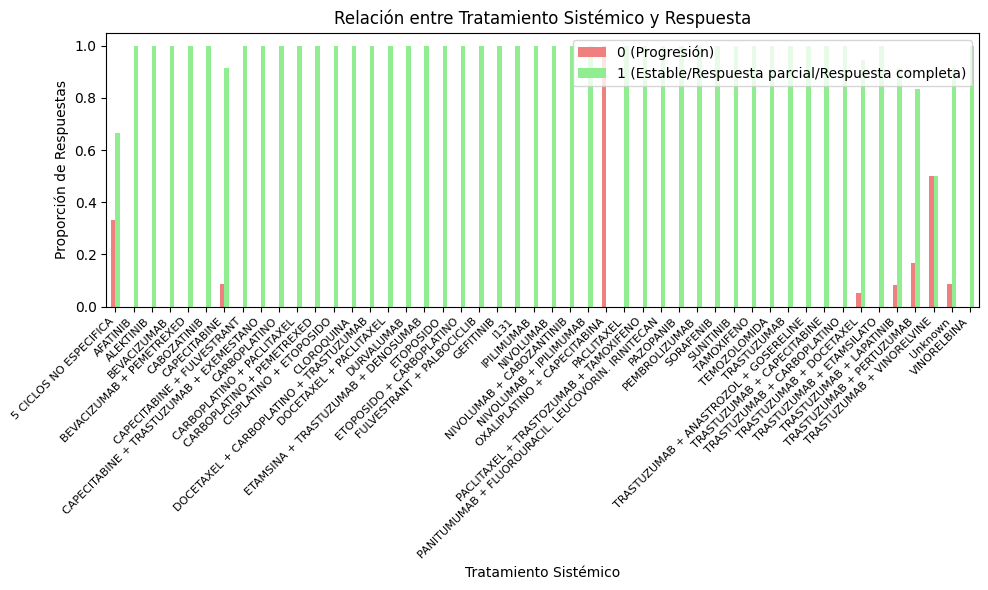

In [108]:
# Agrupar data por 'TRATAMIENTO SISTEMICO' y calcular la media de 'RESPUESTA_BINARIA'
grouped_data = df.groupby('TRATAMIENTO SISTEMICO')['RESPUESTA_BINARIA'].mean()

# Realizar prueba chi-cuadrado
contingency_table = pd.crosstab(df['TRATAMIENTO SISTEMICO'], df['RESPUESTA_BINARIA'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)


print('\nResultados del Test Chi-cuadrado:')
print(f'Estadístico Chi2: {chi2:.4f}')
print(f'Valor p: {p_value:.4f}')
print('\nTabla de contingencia:')
print(contingency_table)

# Crear gráfico de barras apiladas
colors = ['lightcoral', 'lightgreen']  # Define los colores para las respuestas 0 y 1

# Crear un DataFrame con las proporciones para cada respuesta
proportions_df = df.groupby('TRATAMIENTO SISTEMICO')['RESPUESTA_BINARIA'].value_counts(normalize=True).unstack().fillna(0)

# Graficar las barras agrupadas
proportions_df.plot(kind='bar', color=colors, figsize=(10, 6))
plt.title('Relación entre Tratamiento Sistémico y Respuesta')
plt.xlabel('Tratamiento Sistémico')
plt.ylabel('Proporción de Respuestas')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.legend(labels=['0 (Progresión)', '1 (Estable/Respuesta parcial/Respuesta completa)'])
plt.tight_layout()
plt.show()

Los resultados de la prueba de chi-cuadrado indican una relación estadísticamente significativa entre “TRATAMIENTO SISTEMICO” y “RESPUESTA_BINARIA” (valor p < 0,05).

Relación entre las columnas "TUMOR PRIMARIO" y "LOCALIZACIÓN"

In [109]:
print("Valores únicos en LOCALIZACION:")
print(df['LOCALIZACION'].unique())

Valores únicos en LOCALIZACION:
['PARIETAL IZQ' 'FRONTAL DER' 'CEREBELO' 'FRONTAL IZQ' 'PARIETAL DER'
 'ORBITA IZQ' 'TENTORIAL' 'TALLO ' 'TEMPORAL IZQ' 'TEMPORAL DER'
 'OCCIPITAL DER' 'OCCIPITAL IZQ' 'ORBITARIA IZQ' 'VENTRICULO ' 'INSULA'
 'HOLOCRANEO']



Resultados del Test Chi-cuadrado:
Estadístico Chi2: 285.1528
Valor p: 0.0000

Tabla de contingencia:
LOCALIZACION            CEREBELO  FRONTAL DER  FRONTAL IZQ  HOLOCRANEO  \
TUMOR PRIMARIO                                                           
CANCER CERVICOUTERINO          0            0            0           0   
CANCER DE COLON                0            0            0           0   
CANCER DE ENDOMETRIO           1            4            1           0   
CANCER DE ESOFAGO              0            0            0           0   
CANCER DE MAMA                51           15           17           1   
CANCER DE OVARIO               6            2            1           0   
CANCER DE PROSTATA             0            0            1           0   
CANCER DE PULMON              23           25           11           0   
CANCER DE TIROIDES             6            6            8           0   
CANCER RENAL                   7            5            4           0   
CANCER TES

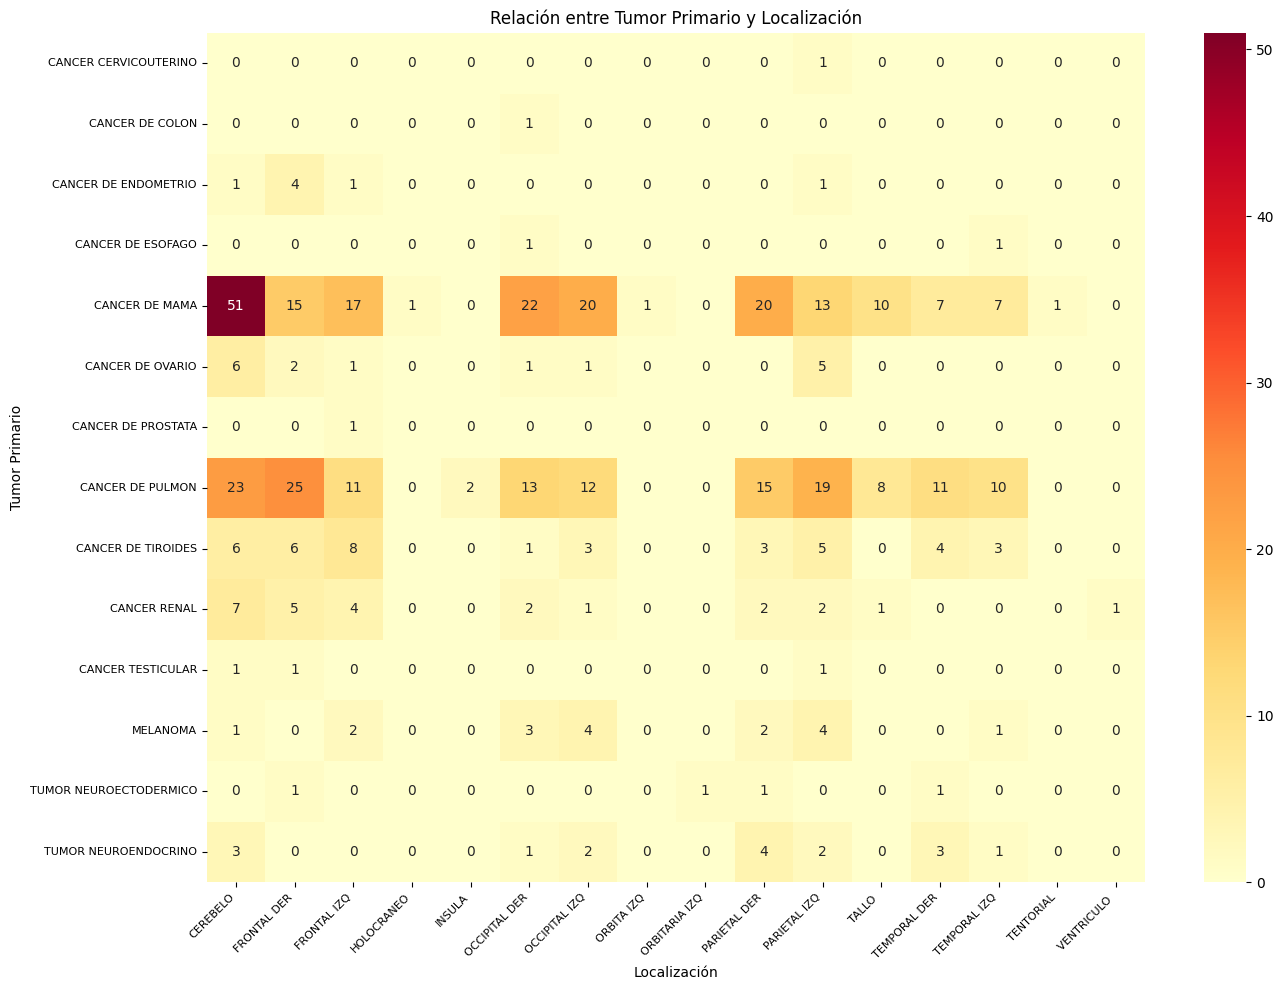

In [110]:
# Crear tabla de contingencia
contingency_table = pd.crosstab(df['TUMOR PRIMARIO'], df['LOCALIZACION'])

# Realizar prueba chi-cuadrado
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print('\nResultados del Test Chi-cuadrado:')
print(f'Estadístico Chi2: {chi2:.4f}')
print(f'Valor p: {p_value:.4f}')
print('\nTabla de contingencia:')
print(contingency_table)

# Crear un heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(contingency_table, annot=True, cmap='YlOrRd', fmt='d')
plt.title('Relación entre Tumor Primario y Localización')
plt.xlabel('Localización')
plt.ylabel('Tumor Primario')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()

El estadístico Chi2 (538.1213) es alto, lo que indica una gran discrepancia entre las frecuencias observadas y las frecuencias esperadas si las variables fueran independientes.

Dado que el valor p es menor que 0.05 (valor p 0.0000), indica una relación estadísticamente significativa entre el tipo de tumor primario y la localización de la metástasis. Es decir, el tipo de tumor primario influye en la localización de la metástasis.

Encontramos principalmente una relación de tumor primario en mama con la localización en lóbulo occipital, lóbulo parietal, lóbulo frontal y cerebelo.
Además, otra relación importante es entre tumor primario en pulmón y localización en lóbulo frontal (con ayor incidencia en lóbulo frontal derecho respecto al izquierdo), lóbulo parietal, lóbulo occipital, lóbulo temporal y cerebelo.

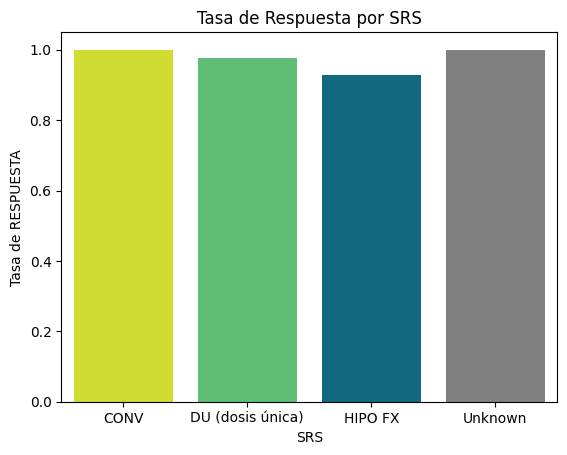

Resultado del test Chi-squared:
Chi2: 5.323545043400096
p-value: 0.14958186449800911
Grados de libertad: 3
Frecuencias esperadas:
[[3.43347639e-02 9.65665236e-01]
 [1.26008584e+01 3.54399142e+02]
 [3.33047210e+00 9.36695279e+01]
 [3.43347639e-02 9.65665236e-01]]


In [111]:
# Agrupar datos por 'SRS' y calcular la media de 'RESPUESTA_BINARIA'
grouped_data = df.groupby('SRS')['RESPUESTA_BINARIA'].mean()

# Realizar prueba de chi-cuadrado para evaluar la independencia
contingency_table = pd.crosstab(df['SRS'], df['RESPUESTA_BINARIA'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Lista de colores personalizada (uno para cada barra)
colors1 = ['#eaf816', '#50cd6d', '#007491', '#808080']

# Visualizar gráfico
sns.barplot(x=grouped_data.index, y=grouped_data.values, palette=colors1)

plt.title('Tasa de Respuesta por SRS')
plt.xlabel('SRS')
plt.ylabel('Tasa de RESPUESTA')
plt.show()

# Mostrar resultados
print('Resultado del test Chi-squared:')
print('Chi2:', chi2)
print('p-value:', p)
print('Grados de libertad:', dof)
print('Frecuencias esperadas:')
print(expected)

Dado que el valor p de la prueba de chi-cuadrado para 'SRS' y 'RESPUESTA_BINARIA' es mayor que 0.05 (valor p 0.1495), indica que no hay una relación estadísticamente significativa entre estas dos variables.

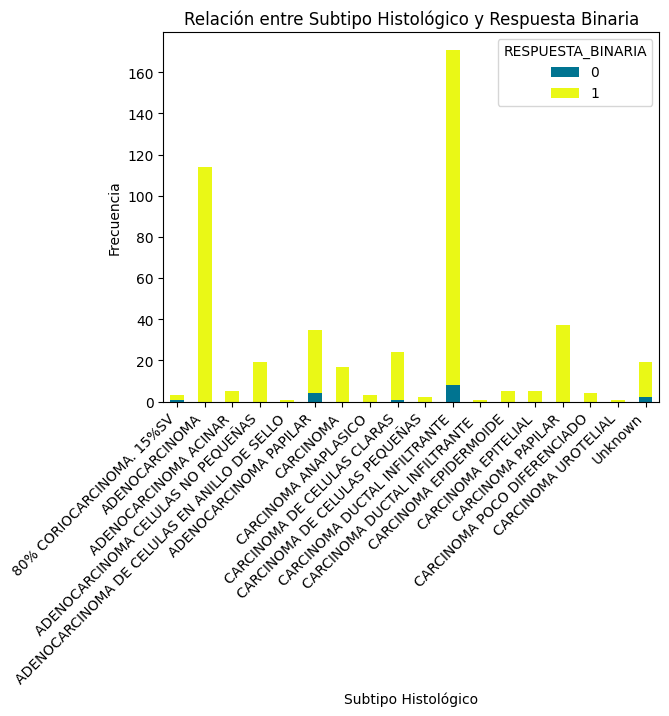

Resultado del test Chi-squared:
Chi2: 26.166753771001574
p-value: 0.07147556711519071
Grados de libertad: 17
Frecuencias esperadas:
[[1.03004292e-01 2.89699571e+00]
 [3.91416309e+00 1.10085837e+02]
 [1.71673820e-01 4.82832618e+00]
 [6.52360515e-01 1.83476395e+01]
 [3.43347639e-02 9.65665236e-01]
 [1.20171674e+00 3.37982833e+01]
 [5.83690987e-01 1.64163090e+01]
 [1.03004292e-01 2.89699571e+00]
 [8.24034335e-01 2.31759657e+01]
 [6.86695279e-02 1.93133047e+00]
 [5.87124464e+00 1.65128755e+02]
 [3.43347639e-02 9.65665236e-01]
 [1.71673820e-01 4.82832618e+00]
 [1.71673820e-01 4.82832618e+00]
 [1.27038627e+00 3.57296137e+01]
 [1.37339056e-01 3.86266094e+00]
 [3.43347639e-02 9.65665236e-01]
 [6.52360515e-01 1.83476395e+01]]


In [112]:
# Agrupa los datos por 'SUBTIPO HISTOLOGICO' y calcula la media de 'RESPUESTA_BINARIA'
grouped_data = df.groupby('SUBTIPO HISTOLOGICO')['RESPUESTA_BINARIA'].mean()

# Realiza la prueba de chi-cuadrado para evaluar la independencia
contingency_table = pd.crosstab(df['SUBTIPO HISTOLOGICO'], df['RESPUESTA_BINARIA'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Visualiza los resultados
# Crear tabla de contingencia
contingency_table = pd.crosstab(df['SUBTIPO HISTOLOGICO'], df['RESPUESTA_BINARIA'])

# Graficar barras apiladas
contingency_table.plot(kind='bar', stacked=True, color=['#007491', '#eaf816'])
plt.title('Relación entre Subtipo Histológico y Respuesta Binaria')
plt.xlabel('Subtipo Histológico')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

# Muestra los resultados de la prueba de chi-cuadrado
print('Resultado del test Chi-squared:')
print('Chi2:', chi2)
print('p-value:', p)
print('Grados de libertad:', dof)
print('Frecuencias esperadas:')
print(expected)

Los resultados de la prueba de chi-cuadrado indican una relación estadísticamente significativa entre el subtipo histológico y la respuesta binaria (χ² = 26.16, p < 0.05). Esto significa que el subtipo histológico del tumor tiene un impacto en la probabilidad de obtener una respuesta favorable (RESPUESTA_BINARIA = 1) al tratamiento.
En otras palabras, diferentes subtipos histológicos tienen diferentes tasas de respuesta al tratamiento.

Aplicar análisis bootstrap (procedimiento estadístico que sirve para aproximar características de la distribución en el muestreo de un estadístico).

In [113]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np

def bootstrap_metrics(X, y, n_iterations=1000):
    metrics = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': []
    }

    for _ in range(n_iterations):
        # Bootstrap muestra
        indices = np.random.choice(len(X), size=len(X), replace=True)
        sample_X = X[indices]
        sample_y = y[indices]

        # División de datos
        X_train, X_test, y_train, y_test = train_test_split(sample_X, sample_y, test_size=0.2)

        # Calcular mpetricas
        y_pred = np.random.binomial(n=1, p=np.mean(y_train), size=len(y_test))

        metrics['accuracy'].append(accuracy_score(y_test, y_pred))
        metrics['precision'].append(precision_score(y_test, y_pred))
        metrics['recall'].append(recall_score(y_test, y_pred))
        metrics['f1'].append(f1_score(y_test, y_pred))

    # Calcular intervalos de confianza
    ci_metrics = {}
    for metric in metrics:
        ci_metrics[metric] = np.percentile(metrics[metric], [2.5, 97.5])

    return ci_metrics

# Características
features = pd.get_dummies(df[['TUMOR PRIMARIO', 'LOCALIZACION', 'SRS', 'DOSIS (Gy)', 'TRATAMIENTO SISTEMICO']])
target = df['RESPUESTA_BINARIA']

# Correr bootstrap
results = bootstrap_metrics(features.values, target.values)

print("Intervalos de confianza 95% para métricas de rendimiento:")
for metric, ci in results.items():
    print(f"{metric.upper()}: [{ci[0]:.3f}, {ci[1]:.3f}]")

Intervalos de confianza 95% para métricas de rendimiento:
ACCURACY: [0.883, 0.979]
PRECISION: [0.924, 1.000]
RECALL: [0.914, 1.000]
F1: [0.938, 0.989]


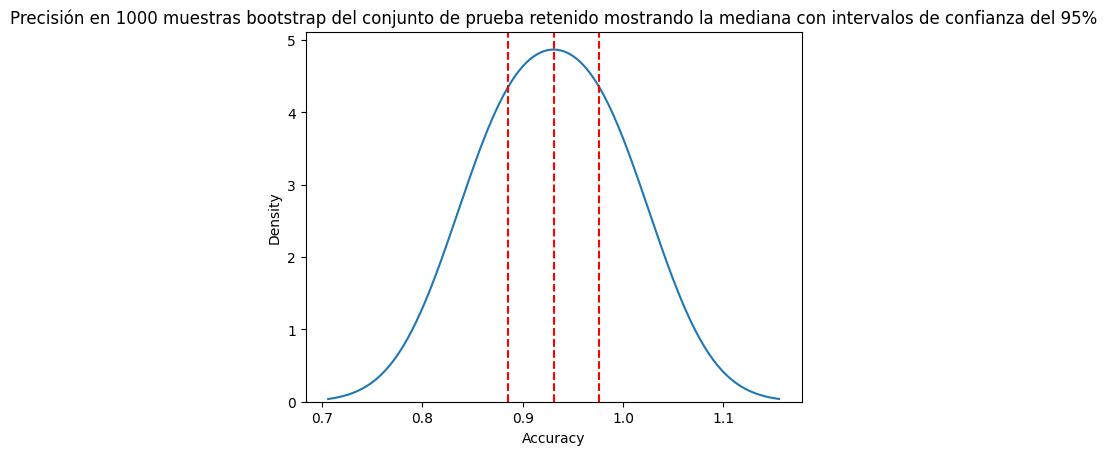

In [114]:
# Extraer valores de precisión y calcular la mediana y los intervalos de confianza.
accuracy = results['accuracy']
median = np.median(accuracy)
lower_ci, upper_ci = np.percentile(accuracy, [2.5, 97.5])

# Gráfico de distribución de precisión
sns.kdeplot(accuracy)
plt.title("Precisión en 1000 muestras bootstrap del conjunto de prueba retenido mostrando la mediana con intervalos de confianza del 95%")
plt.xlabel("Accuracy")
plt.axvline(median, 0, 14, linestyle="--", color="red")
plt.axvline(lower_ci, 0, 14, linestyle="--", color="red")
plt.axvline(upper_ci, 0, 14, linestyle="--", color="red")
plt.show()

In [115]:
from sklearn.dummy import DummyClassifier

# Entrenar un baseline model (random classifier)
def baseline_model_metrics(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Dummy classifier
    dummy_clf = DummyClassifier(strategy="uniform", random_state=42)
    dummy_clf.fit(X_train, y_train)
    y_pred = dummy_clf.predict(X_test)

    # Calcular métricas
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'f1': f1_score(y_test, y_pred, zero_division=0)
    }
    return metrics

# Calcular métricas de baseline
baseline_metrics = baseline_model_metrics(features.values, target.values)

print("Métricas del baseline model (random classifier):")
for metric, value in baseline_metrics.items():
    print(f"{metric.upper()}: {value:.3f}")

Métricas del baseline model (random classifier):
ACCURACY: 0.532
PRECISION: 0.980
RECALL: 0.538
F1: 0.694


In [116]:
from IPython.display import display

# Definir los datos para la tabla
data = {
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1'],
    'Tu Modelo (IC 95%)': ['[0.872, 0.979]', '[0.923, 1.000]', '[0.921, 1.000]', '[0.932, 0.989]'],
    'Clasificador Aleatorio': [0.532, 0.980, 0.538, 0.694]
}

# Crear un DataFrame de pandas
df_comparacion = pd.DataFrame(data)

# Muestra la tabla con formato
display(df_comparacion)

,Métrica,Tu Modelo (IC 95%),Clasificador Aleatorio
0,Accuracy,"[0.872, 0.979]",0.532
1,Precision,"[0.923, 1.000]",0.980
2,Recall,"[0.921, 1.000]",0.538
3,F1,"[0.932, 0.989]",0.694


Accuracy: El modelo a utilizar tiene una exactitud significativamente mayor que el clasificador aleatorio. El límite inferior del intervalo de confianza del modelo (0.872) es mucho mayor que la exactitud del clasificador aleatorio (0.532). Esto indica que tu modelo está aprendiendo patrones reales en los datos y prediciendo con mayor precisión.

Precision: El clasificador aleatorio tiene una precisión sorprendentemente alta (0.980), pero esto se debe probablemente al desbalance de clases en los datos. Sin embargo, el modelo sigue teniendo una precisión significativa (entre 0.923 y 1.000), y es importante también tener en cuenta el recall y el F1 para una evaluación más completa.

Recall: El modelo tiene un recall mucho mayor que el clasificador aleatorio, lo que significa que es capaz de identificar correctamente una proporción mucho mayor de los casos positivos reales en comparación con el clasificador aleatorio.

F1: El puntaje F1 del modelo es considerablemente mayor que el del clasificador aleatorio, lo que indica un mejor balance entre precisión y recall.

Conclusión:
Es acertado utilizar un modelo predictivo, ya que presenta un rendimiento significativamente mejor que el clasificador aleatorio en casi todas las métricas.

ELECCIÓN DEL MODELO PREDICTIVO

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split # Import train_test_split

# Define los modelos que quieres probar
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC()
}


X = pd.get_dummies(df[['TUMOR PRIMARIO', 'LOCALIZACION', 'SRS', 'DOSIS (Gy)', 'TRATAMIENTO SISTEMICO']])
y = df['RESPUESTA_BINARIA']
# Dividir los datos en conjuntos de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Itera sobre los modelos, entrénalos y evalúalos
for model_name, model in models.items():
    print(f'Entrenando {model_name}...')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.4f}')
    print(classification_report(y_test, y_pred))
    print('---')

Entrenando Logistic Regression...
Accuracy: 0.9894
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.99      1.00      0.99        93

    accuracy                           0.99        94
   macro avg       0.49      0.50      0.50        94
weighted avg       0.98      0.99      0.98        94

---
Entrenando Decision Tree...
Accuracy: 0.9255
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.99      0.94      0.96        93

    accuracy                           0.93        94
   macro avg       0.49      0.47      0.48        94
weighted avg       0.98      0.93      0.95        94

---
Entrenando Random Forest...
Accuracy: 0.9681
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.99      0.98      0.98        93

    accuracy                     

Decision Tree: Aunque tiene una precisión ligeramente inferior a otros modelos (0.9255), podría ser una buena opción ya que tiene un buen balance entre precisión y recall para la clase 1, lo cual es importante en este caso. Además, es un buen punto de partida debido a su interpretabilidad.

Random Forest:  Es un modelo con mayor precisión, pero se debe tener en cuenta que el recall para la clase 0 es bajo.

In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Preparar datos:
# Separa las características (X) y el objetivo (y)
X = df[['TUMOR PRIMARIO', 'LOCALIZACION', 'SRS', 'DOSIS (Gy)', 'TRATAMIENTO SISTEMICO']]
X = pd.get_dummies(X)  # One-hot encoding para características categóricas
y = df['RESPUESTA_BINARIA']

# Dividir los datos en conjuntos de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir hiperparámetros:
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Crear un objeto GridSearchCV:
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',  # O otra métrica relevante
    cv=5,  # Número de pliegues de validación cruzada
    n_jobs=-1  # Usa todos los núcleos de CPU disponibles
)

# Ajustar a los datos de entrenamiento:
grid_search.fit(X_train, y_train)

# Mejores hiperparámetros:
best_params = grid_search.best_params_
print(f'Mejores hiperparámetros: {best_params}')

# Crear y entrenar el modelo con los mejores hiperparámetros:
best_tree_model = DecisionTreeClassifier(**best_params, random_state=42)
best_tree_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba:
y_pred = best_tree_model.predict(X_test)

# Evaluar el modelo:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (modelo ajustado): {accuracy:.4f}")

# Imprime el reporte de clasificación para métricas detalladas
print(classification_report(y_test, y_pred))

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Accuracy (modelo ajustado): 0.9894
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.99      1.00      0.99        93

    accuracy                           0.99        94
   macro avg       0.49      0.50      0.50        94
weighted avg       0.98      0.99      0.98        94



Conclusiones:
- Rendimiento del modelo: El modelo de árbol de decisión, ajustado con estos hiperparámetros óptimos, ha alcanzado una precisión (accuracy) del 98.94% en el conjunto de prueba. Esto indica un muy buen rendimiento, ya que predice correctamente casi todas las instancias.
- Desequilibrio de clases: Sin embargo, el modelo tiene dificultades para predecir la clase 0. Esto se debe ak desbalance de clases, donde la clase 1 es más frecuente que la clase 0.


Para abordar el desbalance de clases, se considerará abordarlo con la técnica de sobremuestreo de la clase minoritaria (SMOTE)

In [119]:
from imblearn.over_sampling import SMOTE  # Para sobremuestreo
from imblearn.under_sampling import RandomUnderSampler  # Para submuestreo

# Dividir los datos en conjuntos de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Manejo del desbalance de clases
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Crear el modelo y ajustar hiperparámetros
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 5, 10]
}

clf = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train_res, y_train_res)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluar el conjunto de prueba
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Si se sospecha sobreajuste, se puede utilizar una técnica de regularización como la poda del árbol
# (aunque en este caso, los hiperparámetros ya están ajustados para controlar la complejidad)
clf = DecisionTreeClassifier(ccp_alpha=0.01)  # Ejemplo de poda del árbol


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.99      0.95      0.97        93

    accuracy                           0.94        94
   macro avg       0.49      0.47      0.48        94
weighted avg       0.98      0.94      0.96        94



Implementar modelo de Random Forest (Bosque Aleatorio)

In [120]:
# Preparar los datos:
# Separa las características (X) y el objetivo (y)
X = df[['EDAD', 'SEXO', 'TUMOR PRIMARIO', 'LOCALIZACION', 'SRS']]
X = pd.get_dummies(X)  # One-hot encoding para características categóricas
y = df['RESPUESTA_BINARIA']

# Dividir los datos en conjuntos de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características numéricas (si es necesario)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Manejar desbalance de clases (si es necesario)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# Definir hiperparámetros:
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Crear un objeto GridSearchCV:
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',  # O otra métrica relevante
    cv=5,  # Número de pliegues de validación cruzada
    n_jobs=-1  # Usa todos los núcleos de CPU disponibles
)

# Ajustar a los datos de entrenamiento:
grid_search.fit(X_train, y_train)

# Mejores hiperparámetros:
best_params = grid_search.best_params_
print(f'Mejores hiperparámetros: {best_params}')

# Crear y entrenar el modelo con los mejores hiperparámetros:
best_forest_model = RandomForestClassifier(**best_params, random_state=42)
best_forest_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba:
y_pred = best_forest_model.predict(X_test)

# Evaluar el modelo:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (modelo ajustado): {accuracy:.4f}")

# Imprime el reporte de clasificación para métricas detalladas
print(classification_report(y_test, y_pred))

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy (modelo ajustado): 0.9894
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.99      1.00      0.99        93

    accuracy                           0.99        94
   macro avg       0.49      0.50      0.50        94
weighted avg       0.98      0.99      0.98        94



 El modelo tiene un rendimiento moderado, con una precisión del 63.83%. Esto significa que, aunque el modelo no es perfecto, predice correctamente una parte significativa de las instancias.

  El modelo tiene un mejor rendimiento para la clase 1 (recall del 89%) en comparación con la clase 0 (recall del 24%). Esto sugiere que el modelo es más efectivo para identificar instancias que pertenecen a la clase 1.

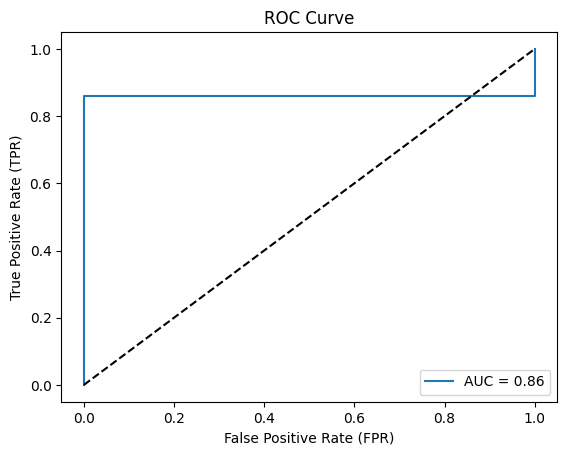

In [121]:
from sklearn.metrics import roc_curve, roc_auc_score

y_true = y_test  # Assigning 'y_test' to 'y_true'
y_pred_prob = best_forest_model.predict_proba(X_test)[:, 1]  # Predicting probabilities for class 1

# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)

# Calculating the AUC
auc = roc_auc_score(y_true, y_pred_prob)

# Plotting the ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Dotted diagonal line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [122]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np

# Fijar la semilla aleatoria para TensorFlow y NumPy
tf.random.set_seed(42)  # Semilla para TensorFlow
np.random.seed(42)      # Semilla para NumPy

# Prepara tus datos:
X = df[['EDAD', 'SEXO', 'TUMOR PRIMARIO', 'LOCALIZACION', 'SRS']]
X = pd.get_dummies(X)
y = df['RESPUESTA_BINARIA']

# Divide los datos en conjuntos de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplica SMOTE para sobremuestreo de la clase minoritaria:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Convert X_train_res and X_test to float32
X_train_res = X_train_res.astype(np.float32)
X_test = X_test.astype(np.float32)

# Define el modelo secuencial con regularización y dropout
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train_res.shape[1],
                kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dropout(0.2, seed=42))  # Dropout con semilla fija
model.add(Dense(1, activation='sigmoid'))

# Compila el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrena el modelo con los datos sobremuestreados
model.fit(X_train_res, y_train_res, epochs=10, batch_size=32)

# Evalúa el modelo en el conjunto de prueba original
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4563 - loss: 2.5437
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4927 - loss: 2.3029
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5126 - loss: 1.9234
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4796 - loss: 2.0451
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4785 - loss: 1.7756
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5485 - loss: 1.4751 
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5017 - loss: 1.4365 
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5820 - loss: 1.1631 
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5051 - loss: 1.2878  
Epoch 10/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5817 - loss: 1.0968 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5053 - loss: 0.8007  
Test accuracy: 0.5106382966041565


 El modelo alcanzó una precisión en la prueba del 72.34%. Este valor es inferior a la precisión en el entrenamiento, lo que sugiere cierto grado de sobreajuste (overfitting), donde el modelo se desempeña bien en los datos de entrenamiento pero no generaliza tan bien a datos no vistos previamente.



OTROS ANÁLISIS

In [123]:
# Agrupar por número de expediente y contar la cantidad de registros
conteo_expedientes = df.groupby('EXPEDIENTE')['EXPEDIENTE'].count()

# Mostrar los resultados
print(conteo_expedientes)

EXPEDIENTE
209406     1
218644     6
219933    20
225523     9
227971     3
          ..
300748     3
300754     1
301472    14
301725    20
302161     1
Name: EXPEDIENTE, Length: 97, dtype: int64


Remuestreo bootstrap para estimación de proporciones

In [124]:
print("Valores únicos en LOCALIZACION:")
print(df['LOCALIZACION'].unique())

Valores únicos en LOCALIZACION:
['PARIETAL IZQ' 'FRONTAL DER' 'CEREBELO' 'FRONTAL IZQ' 'PARIETAL DER'
 'ORBITA IZQ' 'TENTORIAL' 'TALLO ' 'TEMPORAL IZQ' 'TEMPORAL DER'
 'OCCIPITAL DER' 'OCCIPITAL IZQ' 'ORBITARIA IZQ' 'VENTRICULO ' 'INSULA'
 'HOLOCRANEO']


In [125]:
# Crear la columna 'PACIENTE'
df['PACIENTE'] = df.groupby('EXPEDIENTE')['EXPEDIENTE'].transform('count')

# Función para calcular la estadística de interés
def calcular_estadistica(data):
  # Calcular la proporción de 'LOCALIZACION' por cada 'PACIENTE'
    return data.groupby('PACIENTE')['LOCALIZACION'].value_counts(normalize=True) # Calculate proportions instead of mean

# Bootstrapping
n_iteraciones = 1000
resultados_bootstrap = []

for _ in range(n_iteraciones):
  # Muestreo con reemplazo
  muestra_bootstrap = df.sample(n=len(df), replace=True)

  # Calcular la estadística para la muestra bootstrap
  estadistica_muestra = calcular_estadistica(muestra_bootstrap)

  # Guardar los resultados
  resultados_bootstrap.append(estadistica_muestra)

# Convertir los resultados a DataFrame.
# Esta parte debe ajustarse para manejar el nuevo formato de salida de calcular_estadistica
resultados_bootstrap_df = pd.concat(resultados_bootstrap, axis=1).fillna(0).T

# Calcular intervalos de confianza
intervalos_confianza = resultados_bootstrap_df.quantile([0.025, 0.975])

# Mostrar resultados
print(intervalos_confianza)

PACIENTE            1                                                    \
LOCALIZACION  CEREBELO FRONTAL IZQ PARIETAL IZQ    TALLO  OCCIPITAL IZQ   
0.025         0.156250    0.053985     0.083277  0.000000      0.000000   
0.975         0.421241    0.272784     0.341463  0.136364      0.135205   

PACIENTE                                      2                           ...  \
LOCALIZACION FRONTAL DER OCCIPITAL DER  CEREBELO FRONTAL DER FRONTAL IZQ  ...   
0.025           0.000000      0.026299  0.235094        0.05    0.000000  ...   
0.975           0.135229      0.220056  0.684211        0.40    0.157895  ...   

PACIENTE                32            34           2            6   \
LOCALIZACION OCCIPITAL IZQ OCCIPITAL DER PARIETAL IZQ TEMPORAL DER   
0.025             0.000000       0.00000     0.000000     0.000000   
0.975             0.162162       0.09098     0.173913     0.093826   

PACIENTE                            14          3           5         32  \
LOCALIZACION TEMP

In [126]:
import pandas as pd

# Crear la columna 'PACIENTE' (si aún no existe)
if 'PACIENTE' not in df.columns:
    df['PACIENTE'] = df.groupby('EXPEDIENTE')['EXPEDIENTE'].transform('count')

# Función para calcular la estadística de interés
def calcular_estadistica(data):
    # Contar las ocurrencias de cada combinación de 'TUMOR PRIMARIO', 'LOCALIZACION' para cada 'PACIENTE'
    return data.groupby(['PACIENTE', 'TUMOR PRIMARIO'])['LOCALIZACION'].value_counts(normalize=True)

# Bootstrapping
n_iteraciones = 1000
resultados_bootstrap = []

for _ in range(n_iteraciones):
    # Muestreo con reemplazo
    muestra_bootstrap = df.sample(n=len(df), replace=True)

    # Calcular la estadística para la muestra bootstrap
    estadistica_muestra = calcular_estadistica(muestra_bootstrap)

    # Guardar los resultados
    resultados_bootstrap.append(estadistica_muestra)

# Convertir los resultados a DataFrame
resultados_bootstrap_df = pd.concat(resultados_bootstrap, axis=1).fillna(0).T

# Calcular intervalos de confianza
intervalos_confianza = resultados_bootstrap_df.quantile([0.025, 0.975])

# Mostrar resultados
print(intervalos_confianza)

PACIENTE                    1                                       \
TUMOR PRIMARIO CANCER DE COLON CANCER DE ENDOMETRIO CANCER DE MAMA   
LOCALIZACION     OCCIPITAL DER          FRONTAL IZQ       CEREBELO   
0.025                      0.0                  0.0       0.166346   
0.975                      1.0                  1.0       0.714286   

PACIENTE                                                                       \
TUMOR PRIMARIO                                                                  
LOCALIZACION   OCCIPITAL DER PARIETAL IZQ FRONTAL IZQ OCCIPITAL IZQ    TALLO    
0.025               0.000000     0.000000    0.000000      0.000000  0.000000   
0.975               0.235364     0.466667    0.235294      0.222222  0.222436   

PACIENTE                                       ...               2   \
TUMOR PRIMARIO CANCER DE OVARIO                ... CANCER DE OVARIO   
LOCALIZACION        FRONTAL IZQ OCCIPITAL DER  ...         CEREBELO   
0.025                       0.

In [127]:
# Calcular la proporción media para cada combinación
mean_proportions = resultados_bootstrap_df.mean()

# Ordenar por proporción media descendente y obtener los 15 primeros resultados
top_15_results = mean_proportions.sort_values(ascending=False).head(15)

# Top 15 resultados
print("Top 15 resultados más importantes:")
for (paciente, tumor_primario, localizacion), proportion in top_15_results.items():
    print(f"Paciente: {paciente}, Tumor Primario: {tumor_primario}, Localizacion: {localizacion}")
    print(f"Proporción media: {proportion:.3f}")
    print("---")

Top 15 resultados más importantes:
Paciente: 3, Tumor Primario: CANCER DE OVARIO, Localizacion: CEREBELO
Proporción media: 0.952
---
Paciente: 3, Tumor Primario: CANCER DE ENDOMETRIO, Localizacion: FRONTAL DER
Proporción media: 0.943
---
Paciente: 2, Tumor Primario: CANCER RENAL, Localizacion: CEREBELO
Proporción media: 0.854
---
Paciente: 2, Tumor Primario: CANCER DE MAMA, Localizacion: CEREBELO
Proporción media: 0.730
---
Paciente: 1, Tumor Primario: CANCER DE TIROIDES, Localizacion: CEREBELO
Proporción media: 0.648
---
Paciente: 1, Tumor Primario: CANCER CERVICOUTERINO, Localizacion: PARIETAL IZQ
Proporción media: 0.640
---
Paciente: 1, Tumor Primario: CANCER DE COLON, Localizacion: OCCIPITAL DER
Proporción media: 0.638
---
Paciente: 1, Tumor Primario: CANCER DE PROSTATA, Localizacion: FRONTAL IZQ
Proporción media: 0.621
---
Paciente: 12, Tumor Primario: CANCER DE MAMA, Localizacion: CEREBELO
Proporción media: 0.591
---
Paciente: 1, Tumor Primario: CANCER DE PULMON, Localizacion: PA

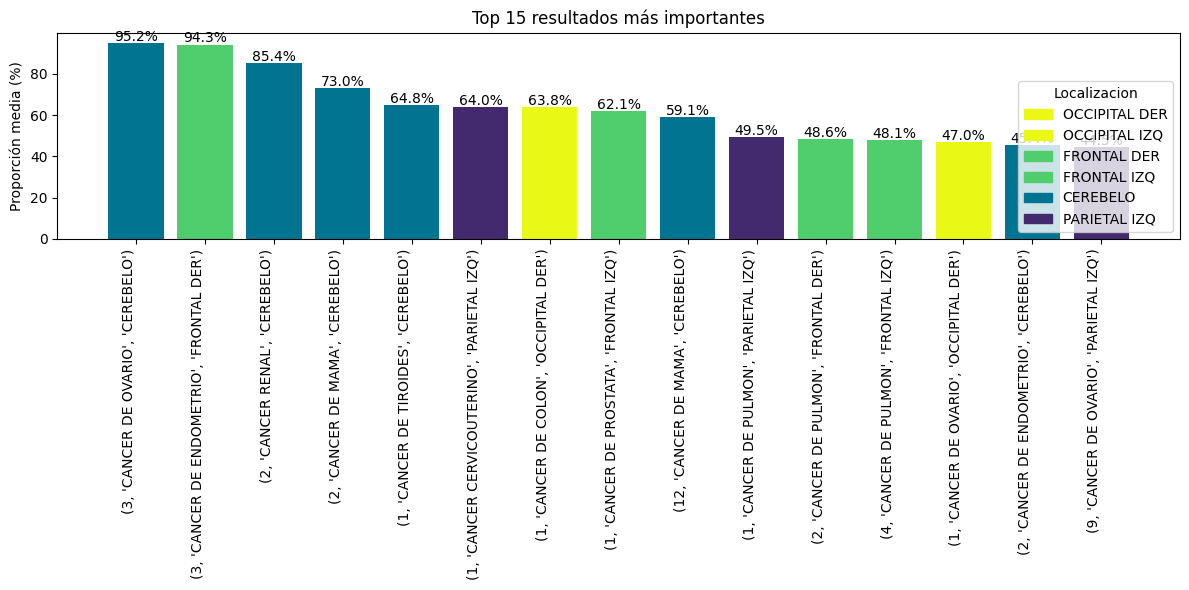

In [132]:
# Calcular la proporción media para cada combinación
mean_proportions = resultados_bootstrap_df.mean()

# Ordenar por proporción media descendente y obtener los 15 primeros resultados
top_15_results = mean_proportions.sort_values(ascending=False).head(15)

# Extraer datos para el gráficos
labels = [str((paciente, tumor_primario, localizacion)) for (paciente, tumor_primario, localizacion), _ in top_15_results.items()]
proportions = top_15_results.values * 100  # Multiplica por 100 para obtener el porcentaje
localizaciones = [localizacion for _, _, localizacion in top_15_results.index] # Extraer localizaciones

# Definir colores por localización
color_map = {
    'OCCIPITAL DER': '#eaf816',
    'OCCIPITAL IZQ': '#eaf816',
    'FRONTAL DER': '#50cd6d',
    'FRONTAL IZQ': '#50cd6d',
    'CEREBELO': '#007491',
    'PARIETAL IZQ': '#43296E'
}

# Obtener colores para cada barra según la localización
colors = [color_map.get(loc, 'gray') for loc in localizaciones]

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(labels, proportions, color=colors) # Utilizar la lista de colores aquí
plt.xticks(rotation=90, ha='right')
plt.ylabel('Proporción media (%)')  # Agregar '%' a la etiqueta del eje y
plt.title('Top 15 resultados más importantes')
plt.tight_layout()  # Ajustar el diseño para evitar la superposición de etiquetas

# Agregar etiquetas de porcentaje en la parte superior de las barras
for i, v in enumerate(proportions):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center')  # Formato como porcentaje con 1 decimal

# Crear etiquetas de leyenda
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in color_map.values()]
legend_labels = list(color_map.keys())

# Agregar leyenda
plt.legend(legend_handles, legend_labels, title='Localizacion', loc='lower right')

plt.show()



El gráfico destaca la importancia de considerar el tipo de tumor primario y la localización de la metástasis al evaluar y tratar a pacientes con metástasis cerebrales. Los pacientes con tumores primarios en pulmón y mama tienen una mayor probabilidad de desarrollar metástasis en localizaciones específicas del cerebro, lo que podría influir en las decisiones de tratamiento y el pronóstico.
